401
802.0
Power works


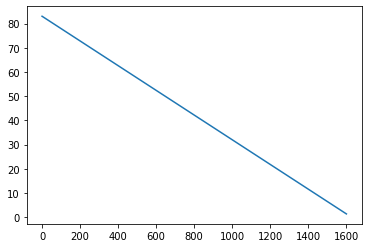

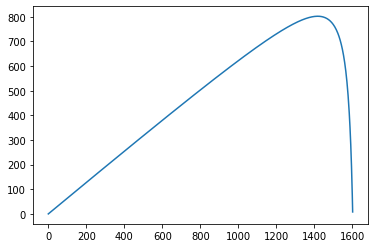

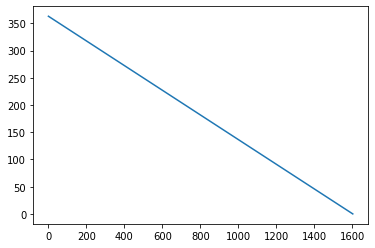

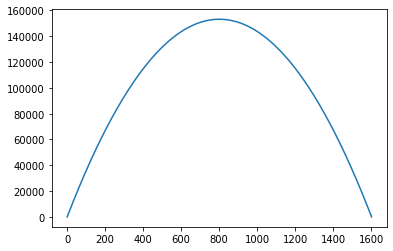

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
nom_v = 7.2
Noloadspeed = 15300
noloadcurrent = 1.4
stalltorque = 363
stallcurrent = 83

frictionballspeed = 276.76
tirepower = 132.64
tireeff = 0.9
frictionballpower = tirepower/tireeff
frictionballtorque = 0.487

noloadspeed = Noloadspeed* 2*np.pi/60
speed = np.arange(0,noloadspeed,2)
grad1 = -stalltorque/noloadspeed
grad2 = -(stallcurrent-noloadcurrent)/noloadspeed
torque = np.zeros(len(speed))
current = np.zeros(len(speed))
efficiency = np.zeros(len(speed))
electricpower = np.zeros(len(speed))
for i in range(len(speed)):
    torque[i] = grad1*speed[i]+stalltorque
    current[i] = grad2*speed[i]+stallcurrent
    electricpower[i] = nom_v * current[i]
    
power = (speed * torque)/0.95
efficiency = power/electricpower

maxindex = np.argmax(power)
maxpowerspeed = speed[maxindex] 
maxpowertorque = torque[maxindex]
maxpowerpower = power[maxindex]
print(maxindex)

print(speed[maxindex])

speedratio = maxpowerspeed/frictionballspeed
torque_actual = frictionballtorque/speedratio

if maxpowerpower>frictionballpower:
    print("Power works")

if torque_actual>maxpowertorque:
    print("Torque works")

plt.plot(speed,current)
plt.show()
plt.plot(speed,efficiency)
plt.show()
plt.plot(speed,torque)
plt.show()
plt.plot(speed,power)
plt.show()

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Constants pre-calculated
desired_speed = 276.76 # desired ouput speed
desired_power = 132.64 / 0.9 # Desired output power
desired_torque = 0.487 # Desired output torque

df = pd.read_excel('Mabuchi_motor.xlsx') # Read data as a panda 

number_of_rows = len(df.index)
# iterate through each motor
for i in range(1,number_of_rows):
    nom_v = df['Nom_voltage'][i]
    no_load_speed_rpm = df['No load speed'][i]
    no_load_current = df['No load current'][i]
    stall_torque = df['Stall torque'][i] * 10**(-3)
    stall_current = df['Stall current'][i]

    no_load_speed = no_load_speed_rpm* 2*np.pi/60
    # Calculate gradients
    grad_torque = - stall_torque / no_load_speed
    grad_current = (no_load_current - stall_current) / no_load_speed

    # Create arrays for variables
    speed = np.arange(0,no_load_speed,2)
    torque = np.zeros(len(speed))
    current = np.zeros(len(speed))
    electric_power = np.zeros(len(speed))
    

    for j in range(len(speed)):
        torque[j] = grad_torque * speed[j] + stall_torque
        current[j] = grad_current * speed[j] + stall_current
        electric_power[j] = nom_v * current[j]
    
    

    mechanical_power = speed * torque / 0.95 # Assume 95% efficiency due to losses
    efficiency = mechanical_power/electric_power
    
    # Find index of max power to calculate variables at max power
    index_max_power = np.argmax(mechanical_power)
    max_power = mechanical_power[index_max_power]
    efficiency_max_power = efficiency[index_max_power]
    torque_max_power = torque[index_max_power]
    speed_max_power = speed[index_max_power]
    speed_max_power_rpm = speed_max_power * 60 / (2*np.pi)
    current_max_power = current[index_max_power]

    if (torque_max_power > desired_torque) and (max_power > desired_power):
        print(df['Model'][i]," ", speed_max_power, " ", no_load_speed, efficiency_max_power, current_max_power, torque_max_power)


RS-775VC-8016   942.0   1884.955592153876 0.5287889584849951 51.12479021602368 0.4907486625963111
RS-775WC-8514   1022.0   2042.0352248333656 0.5476466270687314 66.28875818701096 0.6074150035774181
RZ-8BAWA-AWG19.5x9   1058.0   2115.3390534171276 0.4757068238905131 60.282596300764865 0.5098406483552977
RZ-735VA-9517   1068.0   2136.2830044410593 0.49752762337071316 79.41014759755149 0.6325837905411399
RS-775WC-9013   1100.0   2199.114857512855 0.5245775232686968 79.36916854329657 0.6472393816159858
RT-8B7WA-A19   1168.0   2335.2505391684126 0.539877545564973 94.92109991122902 0.7502591391824251
